# How to use metrics on the surface of a sphere (of Earth Radius)
## Load packages

In [1]:
using Makie, CairoMakie
using DIVAnd

## Prepare grid and coordinates

In [2]:
loni, lati =
    ndgrid(range(0.0, stop = 360.0, length = 200), range(-89, stop = 89, length = 210));

# take out last longitude to not close, that will be done by moddim
#
loni = loni[1:end-1, :]
lati = lati[1:end-1, :]

R = 6371.009e3

# Cartesian coordinates for the plotting on a sphere
xi = R * cosd.(loni) .* cosd.(lati);
yi = R * sind.(loni) .* cosd.(lati);
zi = R * sind.(lati);

mask = trues(size(loni));

## Function to plot on a sphere

In [10]:
function plot_sphere(fi)
    fig = Figure()
    ax = Axis3(fig[1, 1], aspect = :equal, azimuth = 1.75 * π)
    surface!(
        ax,
        xi,
        yi,
        zi,
        color = (fi .- minimum(fi)) / (maximum(fi) - minimum(fi)),
        colormap = :RdYlBu,
    )
    hidedecorations!(ax)
    hidespines!(ax) 
    display(fig)
    return nothing
end

plot_sphere (generic function with 1 method)

## Naive analysis as if coordinates were cartesian

In [4]:
pmc = ones(size(loni)) / (loni[2, 1] - loni[1, 1]);
pnc = ones(size(lati)) / (lati[1, 2] - lati[1, 1]);
lon = [2, 300, 270]
lat = [45, 0.0, 80]
f = [1.0, -1.0, -1.0]
fi, s = DIVAndrun(mask, (pmc, pnc), (loni, lati), (lon, lat), f, (10.0, 10.0), 1.0);

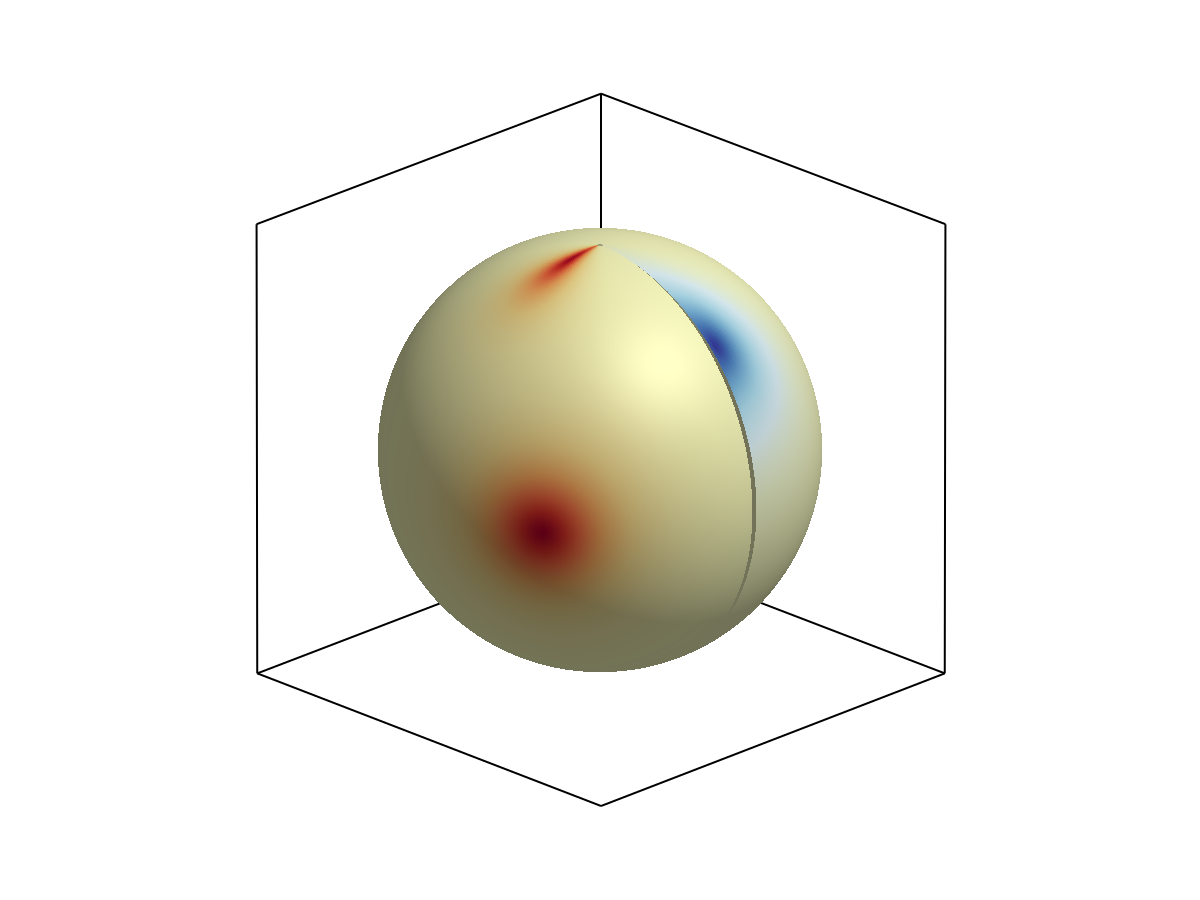

In [5]:
plot_sphere(fi)

## With correct metrics and correlation length in the same metric (meters)

In [6]:
# note that the metric function works with Earth Radius. If you have a sphere of a different radius, just scale the pm accordingly (pm are inverse of length)
pm, pn = DIVAnd_metric(loni, lati)
lon = [2, 300, 270]
lat = [45, 0.0, 80]
f = [1.0, -1.0, -1.0]
fi, s = DIVAndrun(mask, (pm, pn), (loni, lati), (lon, lat), f, (1000000.0, 1000000.0), 1.0);

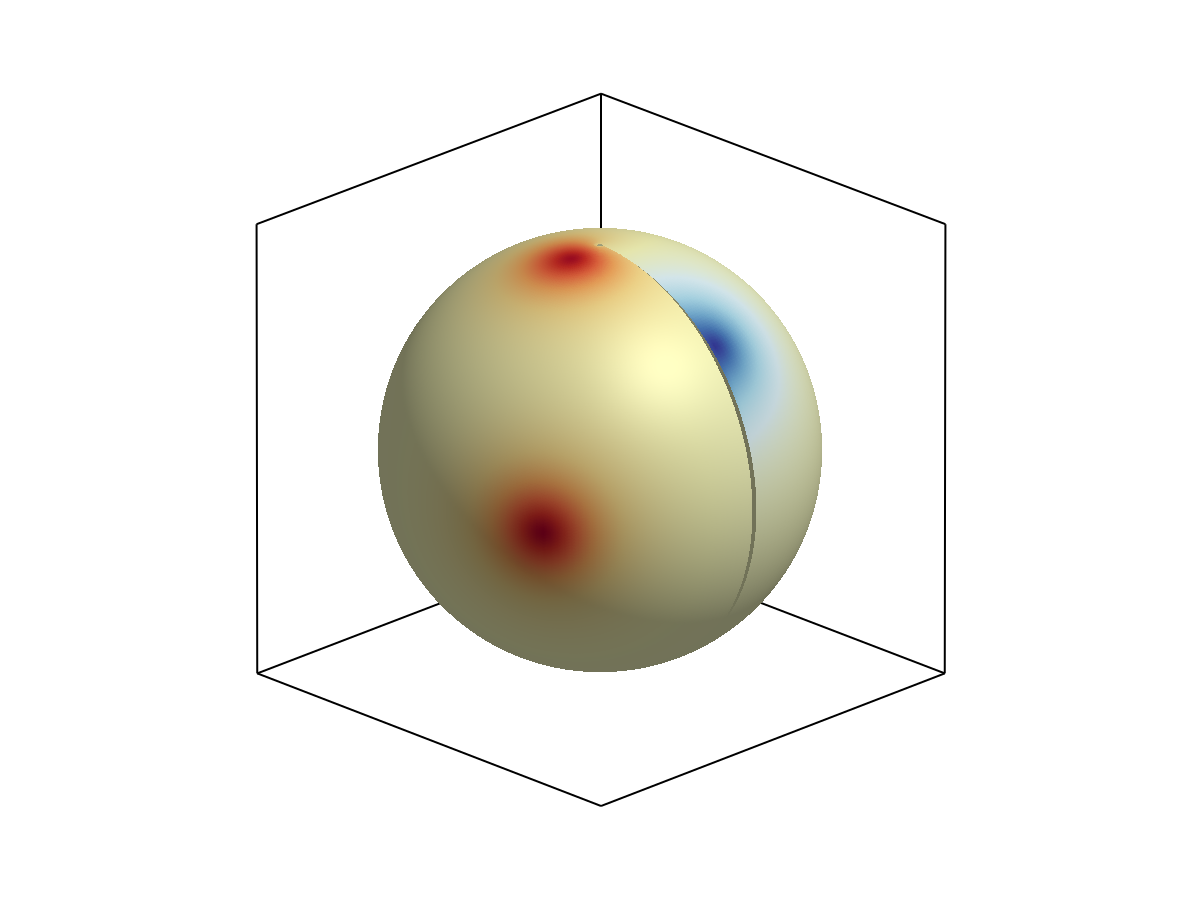

In [7]:
plot_sphere(fi)

## Adding periodicity in the analysis (not the plotting mesh)

In [8]:
pm, pn = DIVAnd_metric(loni, lati)
lon = [2, 300, 270]
lat = [45, 0.0, 80]
f = [1.0, -1.0, -1.0]
fi, s = DIVAndrun(
    mask,
    (pm, pn),
    (loni, lati),
    (lon, lat),
    f,
    (1000000.0, 1000000.0),
    1.0,
    moddim = [1, 0],
);

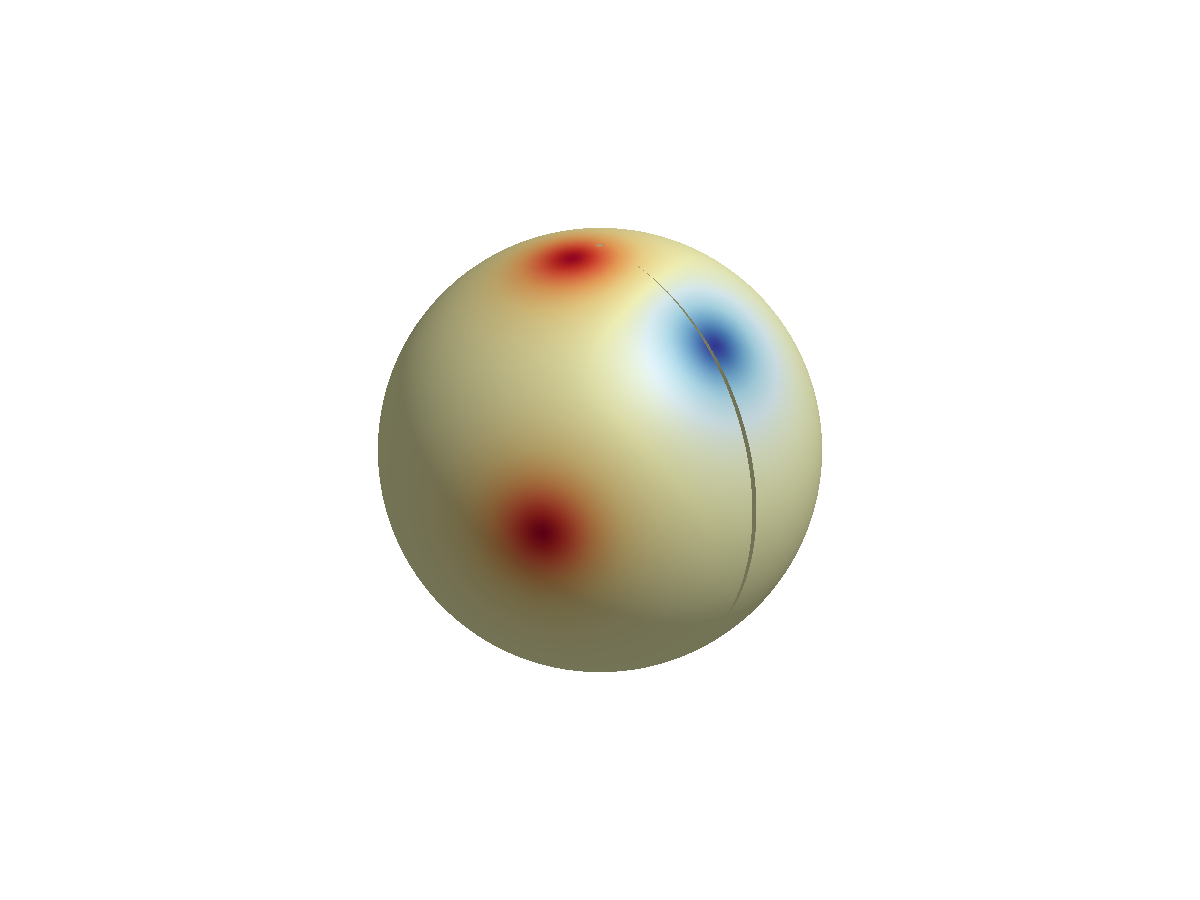

In [11]:
plot_sphere(fi)